# Images statistics

In [48]:
import SimpleITK as sitk
import os
import numpy as np

In [49]:
images_folder = r"D:\Nile University\BDDS\@ CIT654 Deep Learning\@ Essam Rashed\Spider DL Project Data\Data\images"
masks_folder = r"D:\Nile University\BDDS\@ CIT654 Deep Learning\@ Essam Rashed\Spider DL Project Data\Data\masks"

image_files = os.listdir(images_folder)
mask_files = os.listdir(masks_folder)

In [50]:
# Function to get image properties
def get_image_properties(file_path):
    image = sitk.ReadImage(file_path)
    width, height, depth = image.GetSize()
    return width, height, depth

In [51]:
# ChatGPT
# Lists to store depths, widths, heights
image_depths = []
image_widths = []
image_heights = []

# Process images
for image_file in image_files:
    image_path = os.path.join(images_folder, image_file)
    width, height, depth = get_image_properties(image_path)
    image_depths.append(depth)  
    image_widths.append(width)  
    image_heights.append(height) 

# Calculate statistics
max_depth = np.max(image_depths)
mean_depth = np.mean(image_depths)
median_depth = np.median(image_depths)

max_width = np.max(image_widths)
mean_width = np.mean(image_widths)
median_width = np.median(image_widths)

max_height = np.max(image_heights)
mean_height = np.mean(image_heights)
median_height = np.median(image_heights)

# Print results
print(f"Depth statistics:")
print(f"Maximum depth: {max_depth}")
print(f"Mean depth: {mean_depth}")
print(f"Median depth: {median_depth}")

print(f"\nWidth statistics:")
print(f"Maximum width: {max_width}")
print(f"Mean width: {mean_width}")
print(f"Median width: {median_width}")

print(f"\nHeight statistics:")
print(f"Maximum height: {max_height}")
print(f"Mean height: {mean_height}")
print(f"Median height: {median_height}")

Depth statistics:
Maximum depth: 3682
Mean depth: 456.55928411633107
Median depth: 424.0

Width statistics:
Maximum width: 512
Mean width: 105.74720357941834
Median width: 25.0

Height statistics:
Maximum height: 1168
Mean height: 476.4429530201342
Median height: 448.0


In [52]:
# ChatGPT
# Function to get image properties
def get_image_properties(file_path):
    try:
        image = sitk.ReadImage(file_path)
        width, height, depth = image.GetSize()
        spacing = image.GetSpacing()
        direction = image.GetDirection()
        origin = image.GetOrigin()
        return width, height, depth, spacing, direction, origin
    except Exception as e:
        print(f"Error reading image at {file_path}: {str(e)}")
        return None


# Lists to store image properties
image_properties_list = []

# Process images
for image_files in image_files:
    image_path = os.path.join(images_folder, image_files)
    if os.path.isfile(image_path):
        image_properties = get_image_properties(image_path)
        if image_properties:
            width, height, depth, spacing, direction, origin = image_properties
            image_properties_list.append((image_file, width, height, depth, spacing, direction, origin))
    else:
        print(f"File not found: {image_path}")

# Print results
for properties in image_properties_list:
    image_files, width, height, depth, spacing, direction, origin = properties
    print(f"Image: {image_file}")
    print(f"Depth: {width}, Height: {height}, Width: {depth}")
    print(f"Spacing: {spacing}")
    print(f"Direction: {direction}")
    print(f"Origin: {origin}")
    print("-" * 50)

Image: 9_t2.mha
Depth: 21, Height: 492, Width: 797
Spacing: (4.389695960744017, 0.6305175528662943, 0.38792314385787563)
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Origin: (-44.77723154001997, -122.57786786661, -106.77207503644567)
--------------------------------------------------
Image: 9_t2.mha
Depth: 21, Height: 492, Width: 797
Spacing: (4.389695960744017, 0.6305175528662943, 0.38792314385787563)
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Origin: (-44.77723154001997, -122.57786786661, -106.77207503644567)
--------------------------------------------------
Image: 9_t2.mha
Depth: 17, Height: 320, Width: 298
Spacing: (4.788765599257572, 0.812500000003979, 0.8762882583044416)
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Origin: (-67.28904018297013, -124.77837801043, -103.82282952743962)
--------------------------------------------------
Image: 9_t2.mha
Depth: 17, Height: 384, Width: 352
Spacing: (4.7905672101450465, 0.6770833134684295, 0.74088355

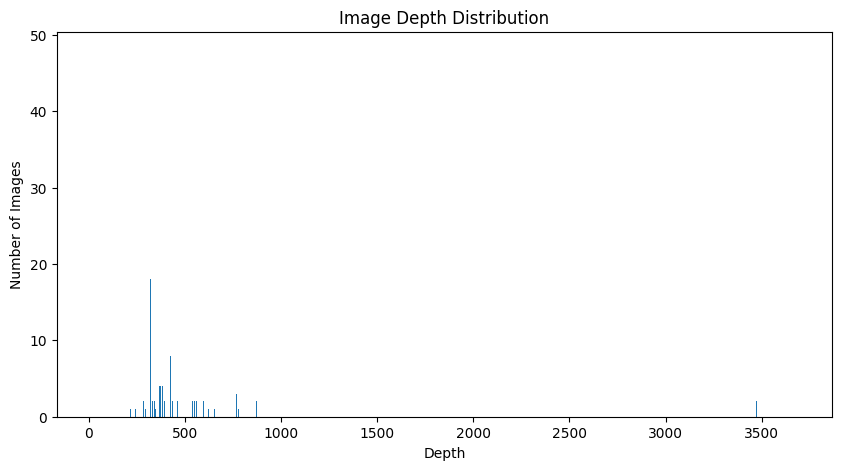

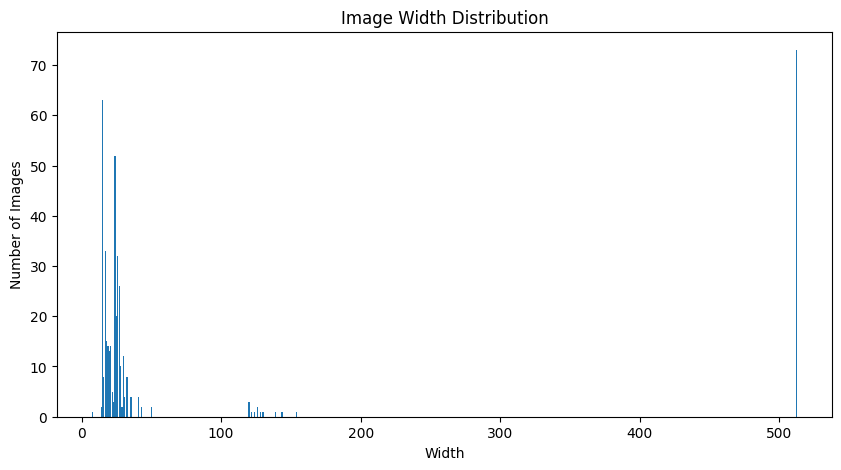

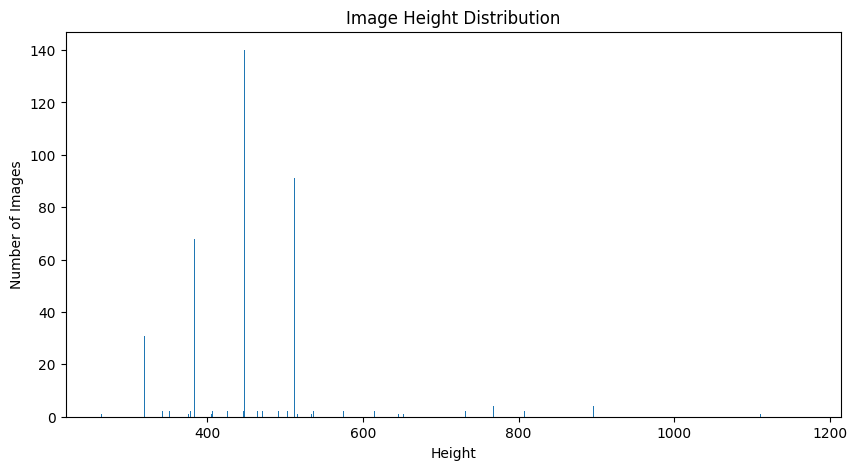

In [53]:
# ChatGPT
# # Function to get image properties
def get_image_properties(file_path):
    image = sitk.ReadImage(file_path)
    width, height, depth = image.GetSize()
    return width, height, depth

# Function to compute image properties statistics for a dataset incrementally
def compute_image_properties_statistics_incremental(images_folder):
    image_depths = []
    image_widths = []
    image_heights = []

    # Iterate over all images in the folder
    image_files = [f for f in os.listdir(images_folder) if f.endswith('.mha')]
    for image_file in image_files:
        image_path = os.path.join(images_folder, image_file)
        
        # Get image properties
        width, height, depth = get_image_properties(image_path)
        image_depths.append(depth)
        image_widths.append(width)
        image_heights.append(height)

    depth_counts = Counter(image_depths)
    width_counts = Counter(image_widths)
    height_counts = Counter(image_heights)

    return depth_counts, width_counts, height_counts

# Function to plot bar chart
def plot_bar_chart(counts, title, xlabel, ylabel):
    items = list(counts.items())
    items.sort()
    keys, values = zip(*items)
    plt.figure(figsize=(10, 5))
    plt.bar(keys, values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

depth_counts, width_counts, height_counts = compute_image_properties_statistics_incremental(images_folder)

# Plot bar charts
plot_bar_chart(depth_counts, 'Image Depth Distribution', 'Depth', 'Number of Images')
plot_bar_chart(width_counts, 'Image Width Distribution', 'Width', 'Number of Images')
plot_bar_chart(height_counts, 'Image Height Distribution', 'Height', 'Number of Images')


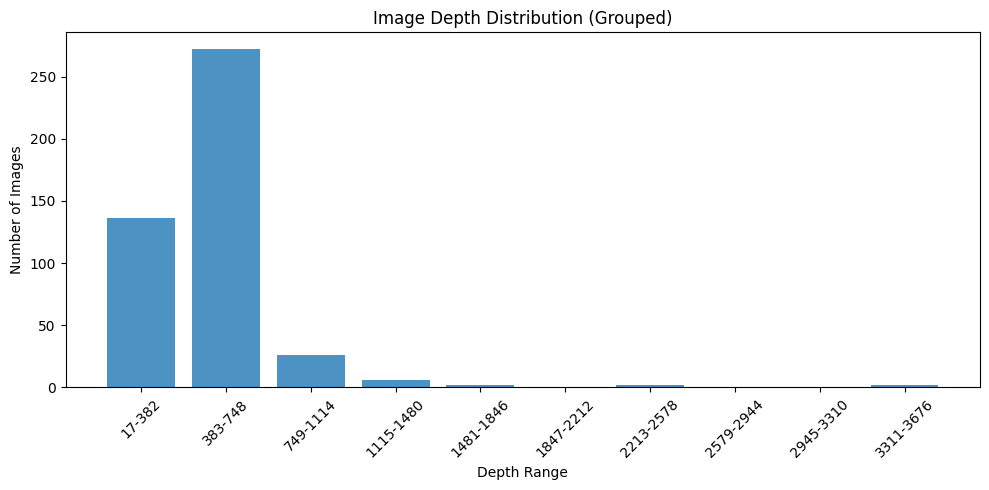

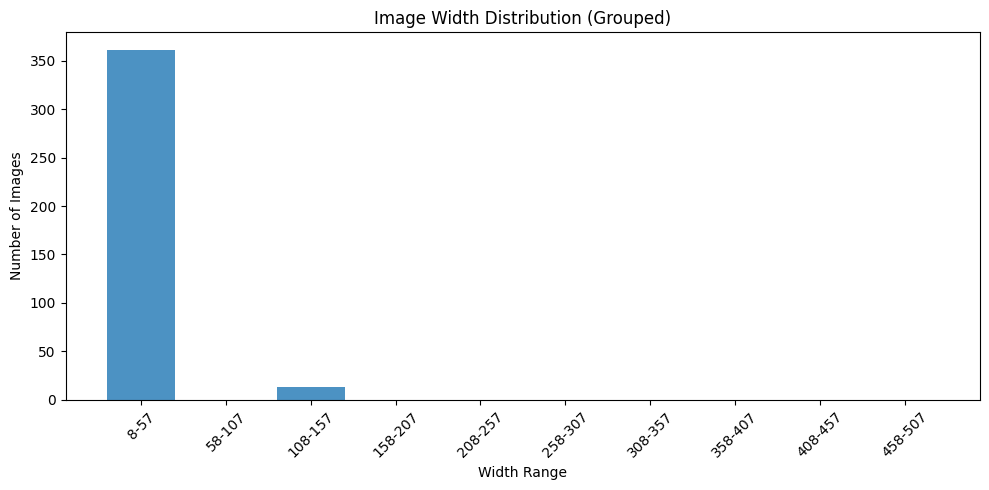

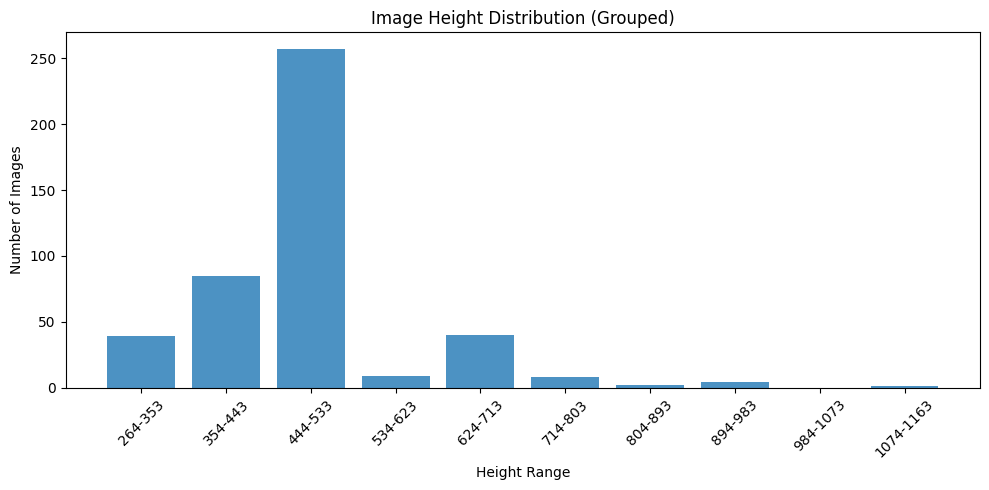

In [54]:
# ChatGPT
# Function to aggregate counts into 10 groups
def aggregate_counts(counts):
    max_value = max(counts.keys())
    min_value = min(counts.keys())
    step = (max_value - min_value + 1) // 10
    grouped_counts = {}
    for i in range(10):
        lower_bound = min_value + i * step
        upper_bound = min_value + (i + 1) * step - 1
        count_sum = sum(counts[val] for val in range(lower_bound, upper_bound + 1) if val in counts)
        grouped_counts[f'{lower_bound}-{upper_bound}'] = count_sum
    return grouped_counts

# Function to plot grouped bar chart
def plot_grouped_bar_chart(grouped_counts, title, xlabel, ylabel):
    keys = list(grouped_counts.keys())
    values = list(grouped_counts.values())
    
    plt.figure(figsize=(10, 5))
    plt.bar(keys, values, align='center', alpha=0.8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Aggregate counts into 10 groups
depth_grouped = aggregate_counts(depth_counts)
width_grouped = aggregate_counts(width_counts)
height_grouped = aggregate_counts(height_counts)

# Plot grouped bar charts
plot_grouped_bar_chart(depth_grouped, 'Image Depth Distribution (Grouped)', 'Depth Range', 'Number of Images')
plot_grouped_bar_chart(width_grouped, 'Image Width Distribution (Grouped)', 'Width Range', 'Number of Images')
plot_grouped_bar_chart(height_grouped, 'Image Height Distribution (Grouped)', 'Height Range', 'Number of Images')

Now, We inspect the dataset orientation and the statistics of the images

# Noise Inspection

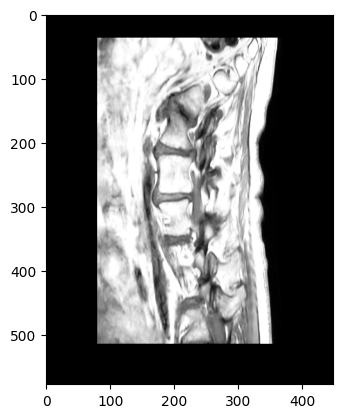

In [55]:
file_path = r"D:\Nile University\BDDS\@ CIT654 Deep Learning\@ Essam Rashed\Spider DL Project Data\Data\images\1_t1.mha"
image = sitk.ReadImage(file_path,imageIO="MetaImageIO")
image= sitk.DICOMOrient(image,'RPS')
image_array = sitk.GetArrayFromImage(image)
image_n_slice = int(image.GetWidth()/2)

plt.imshow(image_array[:, :,image_n_slice], cmap=plt.cm.Greys_r)
plt.show()

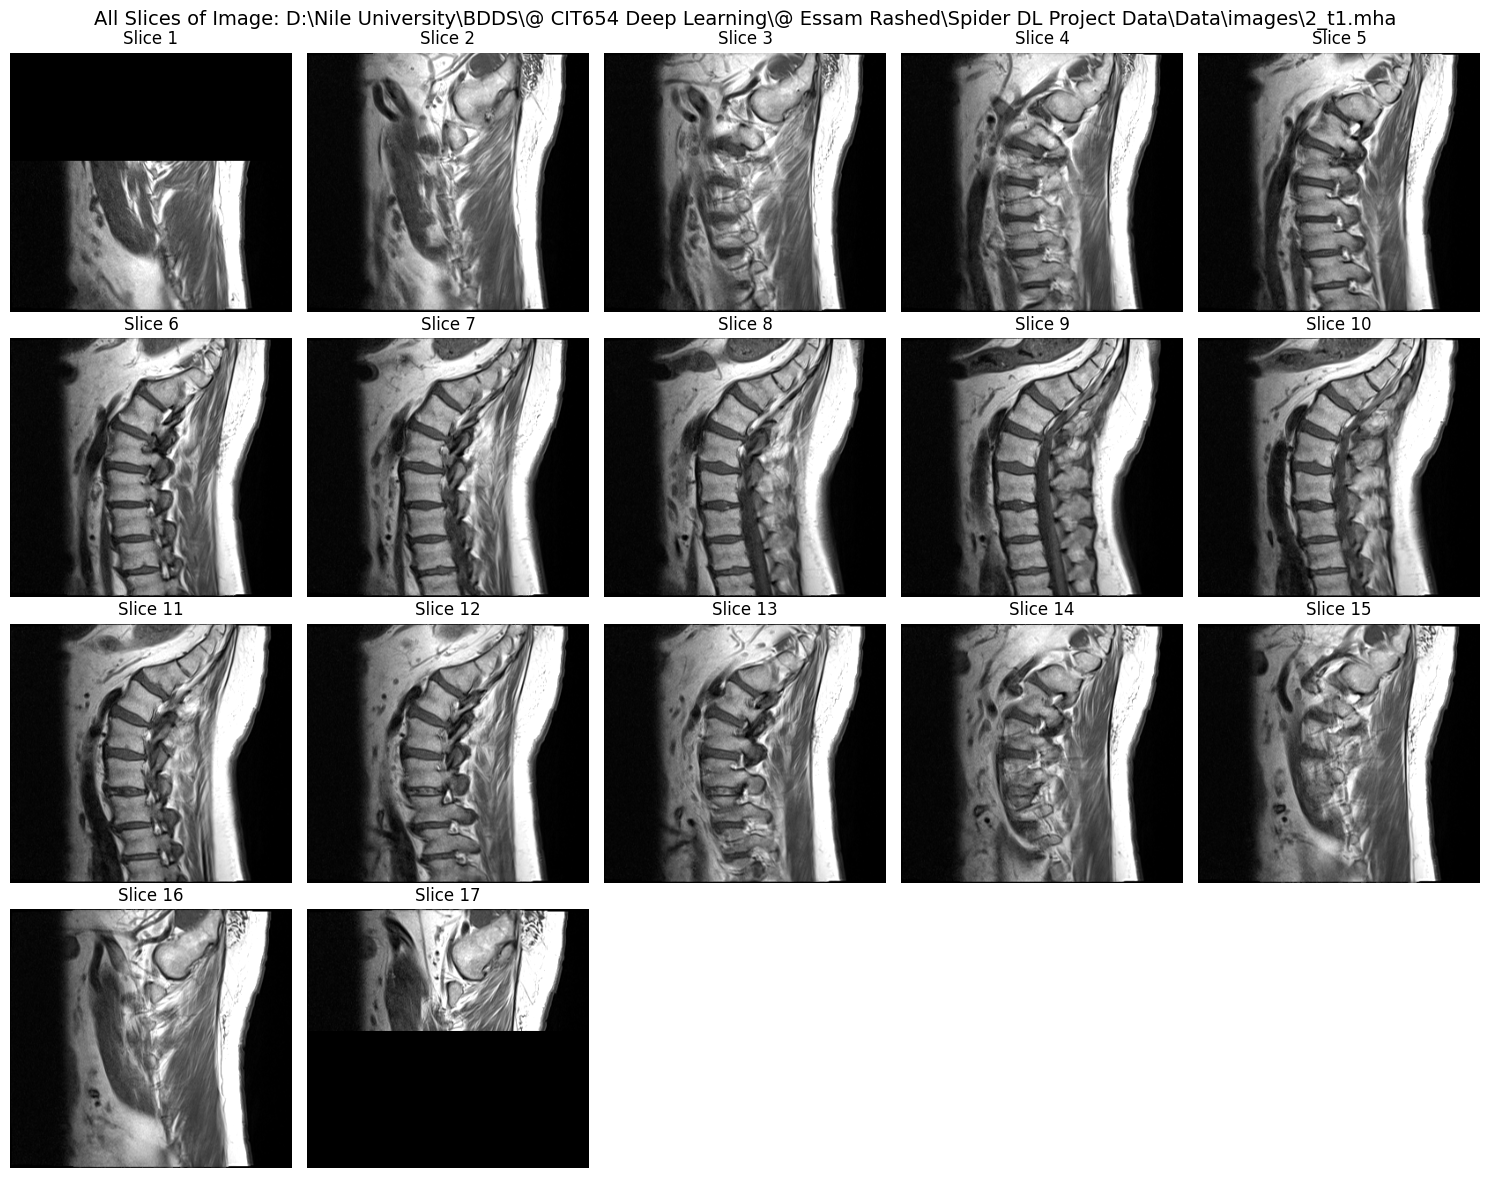

In [56]:
# ChatGPT

image = sitk.ReadImage(file_path, imageIO="MetaImageIO")
image_array = sitk.GetArrayFromImage(image)
num_slices = image.GetWidth()

# Calculate number of rows needed (each row with 5 slices)
num_rows = (num_slices + 4) // 5  # This ensures we round up to the nearest whole number

fig, axes = plt.subplots(num_rows, 5, figsize=(15, 3*num_rows))

for i in range(num_slices):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(image_array[:, :, i], cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f"Slice {i + 1}")

# Remove empty subplots
for i in range(num_slices, num_rows * 5):
    row = i // 5
    col = i % 5
    fig.delaxes(axes[row, col])

plt.suptitle(f"All Slices of Image: {file_path}", fontsize=14)
plt.tight_layout()
plt.show()


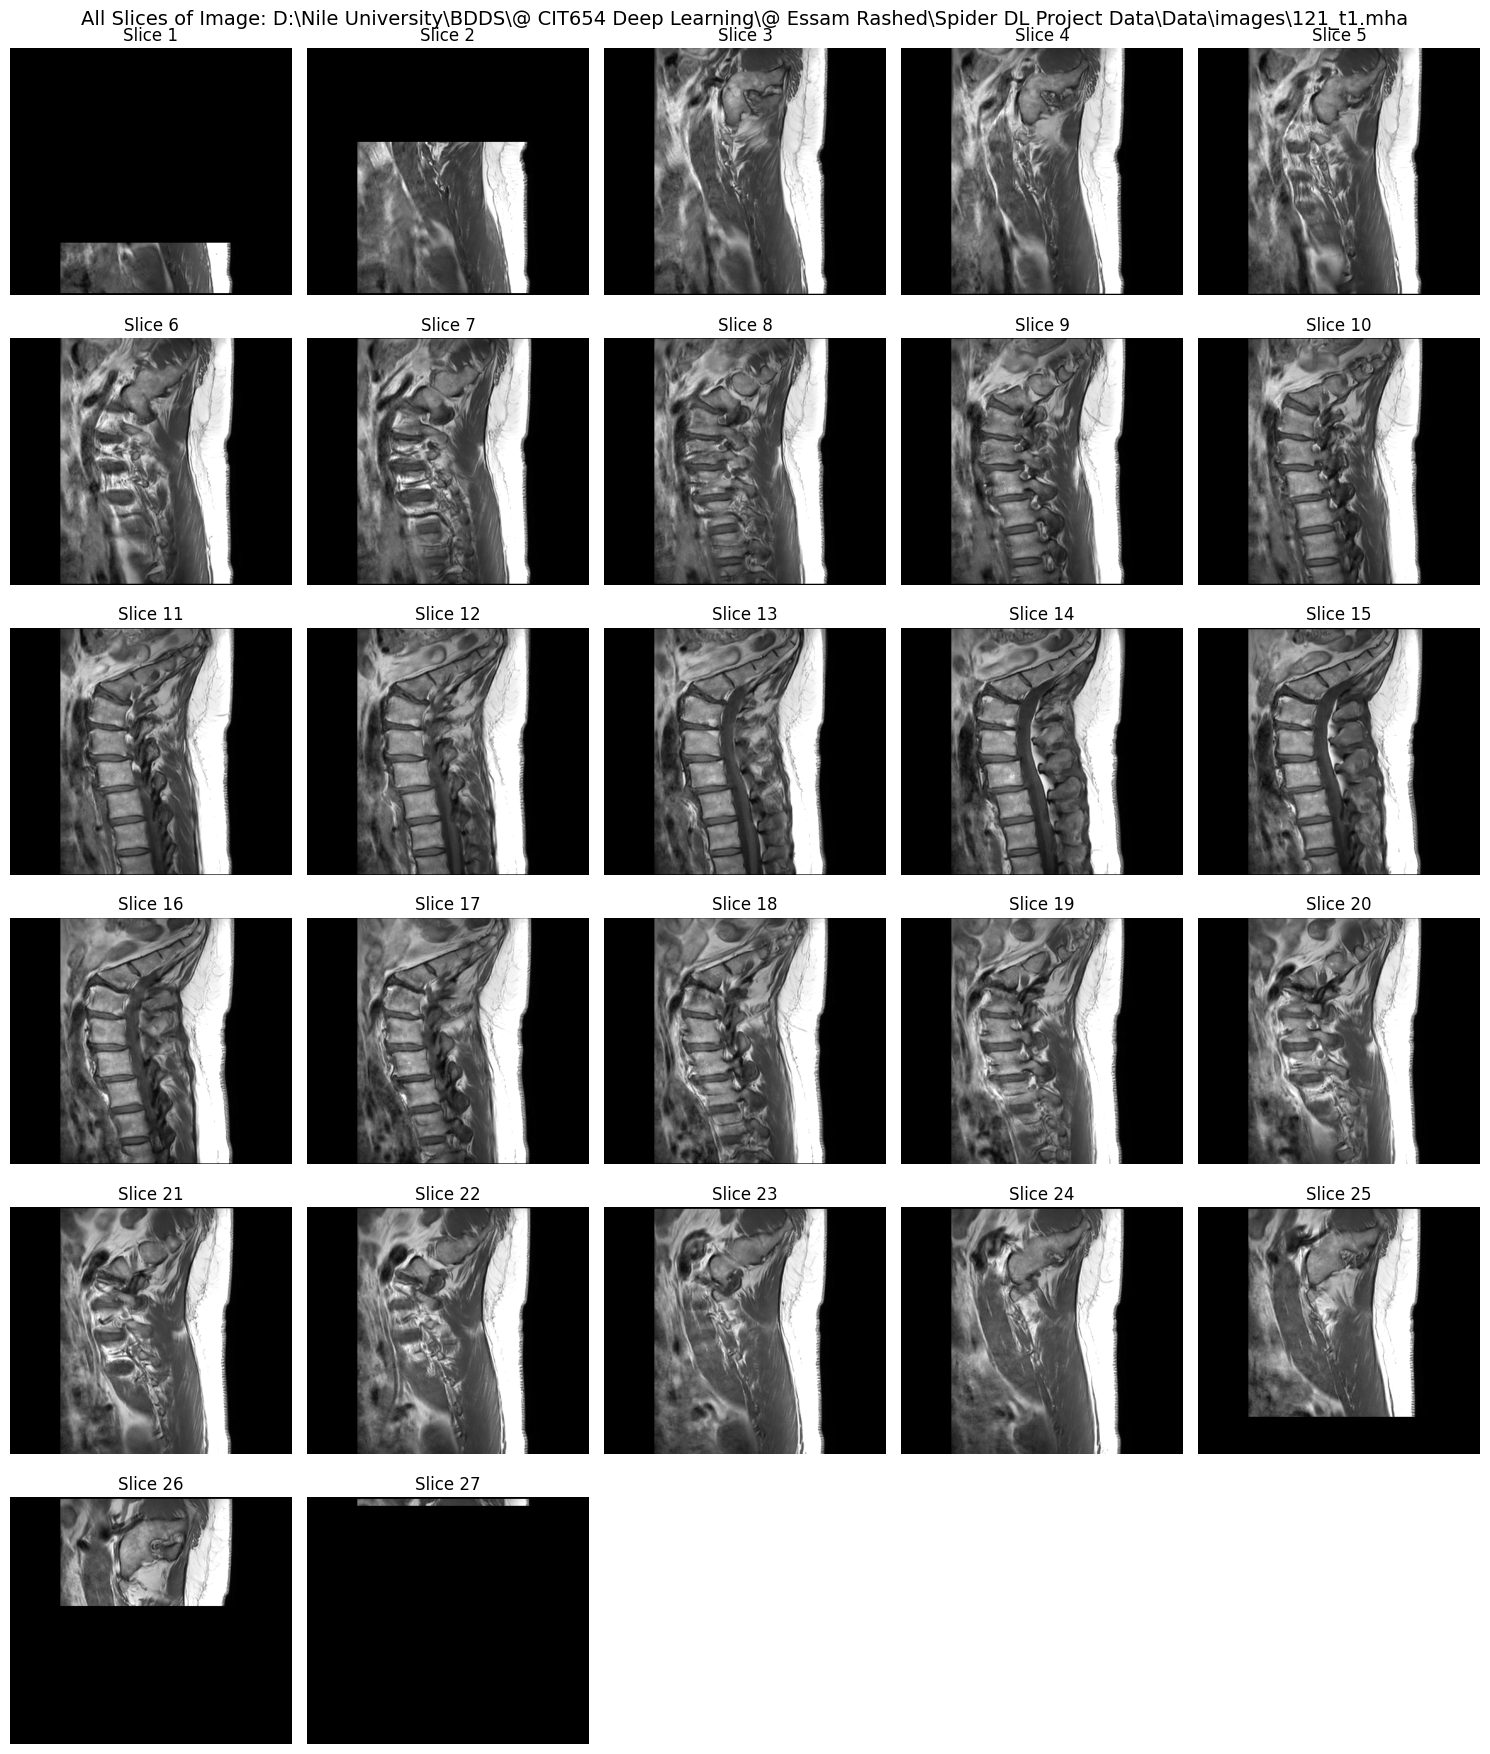

In [57]:
file_path = r"D:\Nile University\BDDS\@ CIT654 Deep Learning\@ Essam Rashed\Spider DL Project Data\Data\images\121_t1.mha"

image = sitk.ReadImage(file_path, imageIO="MetaImageIO")
image_array = sitk.GetArrayFromImage(image)
num_slices = image.GetWidth()

# Calculate number of rows needed (each row with 5 slices)
num_rows = (num_slices + 4) // 5  # This ensures we round up to the nearest whole number

fig, axes = plt.subplots(num_rows, 5, figsize=(15, 3*num_rows))

for i in range(num_slices):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(image_array[:, :, i], cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f"Slice {i + 1}")

# Remove empty subplots
for i in range(num_slices, num_rows * 5):
    row = i // 5
    col = i % 5
    fig.delaxes(axes[row, col])
    
plt.suptitle(f"All Slices of Image: {file_path}", fontsize=14)
plt.tight_layout()
plt.show()

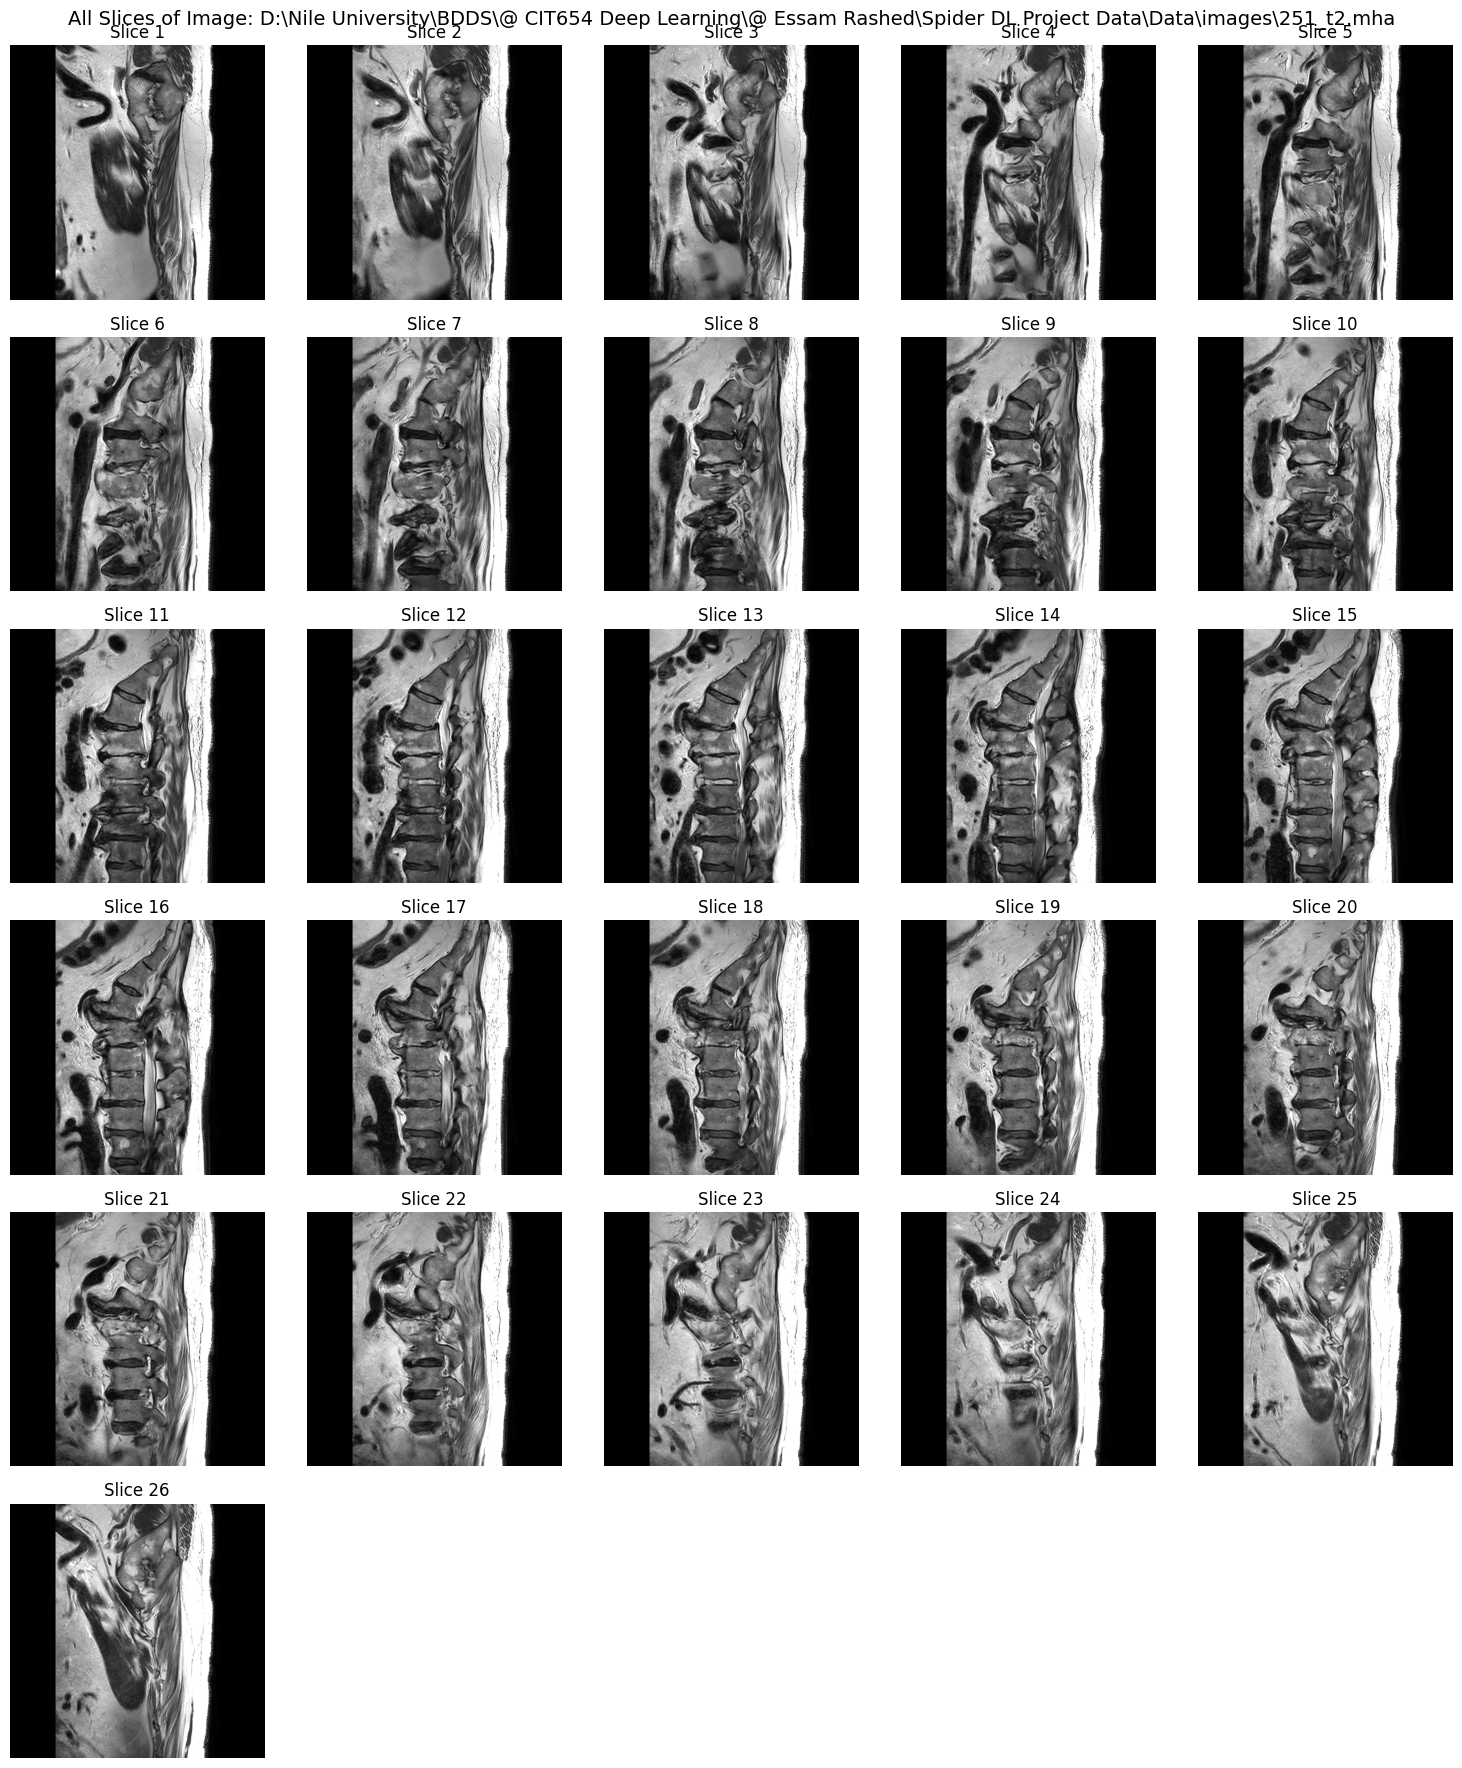

In [58]:
file_path = r"D:\Nile University\BDDS\@ CIT654 Deep Learning\@ Essam Rashed\Spider DL Project Data\Data\images\251_t2.mha"

image = sitk.ReadImage(file_path, imageIO="MetaImageIO")
image_array = sitk.GetArrayFromImage(image)
num_slices = image.GetWidth()

# Calculate number of rows needed (each row with 5 slices)
num_rows = (num_slices + 4) // 5  # This ensures we round up to the nearest whole number

fig, axes = plt.subplots(num_rows, 5, figsize=(15, 3*num_rows))

for i in range(num_slices):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(image_array[:, :, i], cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f"Slice {i + 1}")

# Remove empty subplots
for i in range(num_slices, num_rows * 5):
    row = i // 5
    col = i % 5
    fig.delaxes(axes[row, col])
    
plt.suptitle(f"All Slices of Image: {file_path}", fontsize=14)
plt.tight_layout()
plt.show()

# Intensity 

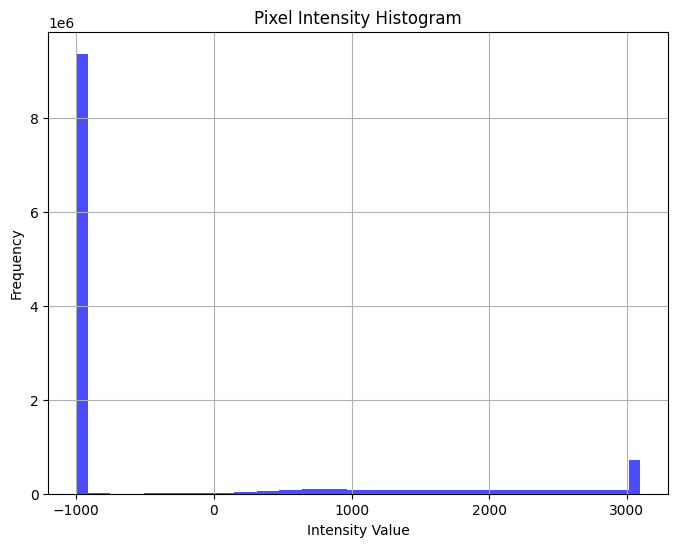

In [59]:
# ChatGPT

import matplotlib.pyplot as plt

# File path to your image
file_path = r"D:\Nile University\BDDS\@ CIT654 Deep Learning\@ Essam Rashed\Spider DL Project Data\Data\images\1_t1.mha"

# Read the image using SimpleITK
image = sitk.ReadImage(file_path, imageIO="MetaImageIO")
image_array = sitk.GetArrayFromImage(image)

# Flatten the 3D array to 1D for histogram plotting
intensity_values = image_array.flatten()

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(intensity_values, bins=50, color='blue', alpha=0.7)
plt.title('Pixel Intensity Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [60]:
# ChatGPT
# Function to compute intensity statistics for an image
def compute_intensity_statistics(image_path):
    # Read the image using SimpleITK
    image = sitk.ReadImage(image_path, imageIO="MetaImageIO")
    image_array = sitk.GetArrayFromImage(image)

    # Flatten the 3D array to 1D for intensity calculations
    intensity_values = image_array.flatten()

    # Compute statistics
    mean_intensity = np.mean(intensity_values)
    median_intensity = np.median(intensity_values)
    std_intensity = np.std(intensity_values)
    min_intensity = np.min(intensity_values)
    max_intensity = np.max(intensity_values)

    return mean_intensity, median_intensity, std_intensity, min_intensity, max_intensity

# Example usage: Replace with your actual images folder path
images_folder = r"D:\Nile University\BDDS\@ CIT654 Deep Learning\@ Essam Rashed\Spider DL Project Data\Data\images"

# Iterate over all images in the folder and compute statistics
image_files = os.listdir(images_folder)
for image_file in image_files:
    image_path = os.path.join(images_folder, image_file)
    mean_intensity, median_intensity, std_intensity, min_intensity, max_intensity = compute_intensity_statistics(image_path)
    
    # Print or use these statistics as needed
    print(f"Image: {image_file}")
    print(f"Mean Intensity: {mean_intensity:.2f}")
    print(f"Median Intensity: {median_intensity:.2f}")
    print(f"Standard Deviation of Intensity: {std_intensity:.2f}")
    print(f"Min Intensity: {min_intensity}")
    print(f"Max Intensity: {max_intensity}")
    print("-" * 50)


Image: 100_t1.mha
Mean Intensity: 323.47
Median Intensity: 119.00
Standard Deviation of Intensity: 1418.86
Min Intensity: -1000
Max Intensity: 3096
--------------------------------------------------
Image: 100_t2.mha
Mean Intensity: 284.09
Median Intensity: -206.00
Standard Deviation of Intensity: 1442.78
Min Intensity: -1000
Max Intensity: 3096
--------------------------------------------------
Image: 101_t1.mha
Mean Intensity: 286.18
Median Intensity: -96.00
Standard Deviation of Intensity: 1329.47
Min Intensity: -1000
Max Intensity: 3096
--------------------------------------------------
Image: 101_t2.mha
Mean Intensity: 96.15
Median Intensity: -451.00
Standard Deviation of Intensity: 1286.26
Min Intensity: -1000
Max Intensity: 3096
--------------------------------------------------
Image: 104_t1.mha
Mean Intensity: 416.17
Median Intensity: 86.00
Standard Deviation of Intensity: 1163.11
Min Intensity: -1000
Max Intensity: 3096
--------------------------------------------------
Image

In [61]:
# ChatGPT
# Function to compute aggregate intensity statistics for a dataset incrementally
def compute_aggregate_intensity_statistics_incremental(images_folder):
    total_sum = 0
    total_sum_squared = 0
    total_count = 0
    global_min = float('inf')
    global_max = float('-inf')

    # Iterate over all images in the folder
    image_files = os.listdir(images_folder)
    for image_file in image_files:
        image_path = os.path.join(images_folder, image_file)
        image = sitk.ReadImage(image_path, imageIO="MetaImageIO")
        image_array = sitk.GetArrayFromImage(image)
        
        # Flatten the 3D array to 1D for intensity calculations
        intensity_values = image_array.flatten()
        
        # Incrementally compute sum, sum of squares, min, and max
        total_sum += np.sum(intensity_values)
        total_sum_squared += np.sum(intensity_values**2)
        total_count += len(intensity_values)
        global_min = min(global_min, np.min(intensity_values))
        global_max = max(global_max, np.max(intensity_values))

    # Compute mean
    aggregate_mean_intensity = total_sum / total_count
    
    # Compute variance and standard deviation
    variance = (total_sum_squared / total_count) - (aggregate_mean_intensity ** 2)
    aggregate_std_intensity = np.sqrt(variance)
    
    # Since we cannot compute the median without all data, we omit it here

    return (aggregate_mean_intensity, aggregate_std_intensity, global_min, global_max)

# Example usage: Replace with your actual images folder path
images_folder = r"D:\Nile University\BDDS\@ CIT654 Deep Learning\@ Essam Rashed\Spider DL Project Data\Data\images"

# Compute aggregate intensity statistics for the entire dataset incrementally
aggregate_stats = compute_aggregate_intensity_statistics_incremental(images_folder)

# Print or use these aggregate statistics
print("Aggregate Intensity Statistics for the Dataset:")
print(f"Aggregate Mean Intensity: {aggregate_stats[0]:.2f}")
print(f"Aggregate Standard Deviation of Intensity: {aggregate_stats[1]:.2f}")
print(f"Aggregate Min Intensity: {aggregate_stats[2]}")
print(f"Aggregate Max Intensity: {aggregate_stats[3]}")

C:\Users\C.A\AppData\Local\Temp\ipykernel_16056\4053340020.py:20: RuntimeWarning: overflow encountered in scalar add
  total_sum += np.sum(intensity_values)
C:\Users\C.A\AppData\Local\Temp\ipykernel_16056\4053340020.py:21: RuntimeWarning: overflow encountered in scalar add
  total_sum_squared += np.sum(intensity_values**2)


Aggregate Intensity Statistics for the Dataset:
Aggregate Mean Intensity: 37.27
Aggregate Standard Deviation of Intensity: nan
Aggregate Min Intensity: -1000
Aggregate Max Intensity: 3096


C:\Users\C.A\AppData\Local\Temp\ipykernel_16056\4053340020.py:31: RuntimeWarning: invalid value encountered in sqrt
  aggregate_std_intensity = np.sqrt(variance)
